# Deep Learning with Python
## Example 4.1 - Improving IMDB Model

Every Deep Learning model must make a compromise between **optimization** and **generalization**. Optimization is a measure of the model's ability to make accurate predictions on the training data. Generalization, on the other hand, is its ability to make accurate predictions on data it has never seen during training, namely the validation and test sets.

If the model is not optimized, it suffers from underfitting - it simply hasn't learnt the associations needed to make accurate predictions. The model's loss on both training and validation and/or test sets will be high.

However, eventually the model can **overfit** the data - it can 'overoptimize' its parameters to perfectly fit the training data at the expense of its ability to make predictions on the test data.

One way of to prevent overfitting is to reduce the network's size. This reduces the number of layers and hence the number of nodes and, by extension, the **learnable parameters** for the network. The number of learnable parameters is called **memorization capacity**. 

A lower memorization capacity means the network is compelled to learn compressed representations of the data instead of memorizing a mapping of inputs to outputs.

We will decrease the size/number of layers in the original IMDB classification ANN to see if this decrease in memorization capacity has any effect on the model's performance.

In [1]:
# importing keras and tf for backend 
import tensorflow as tf, keras

# Necessary for reading dataset
import numpy as np
old = np.load
np.load = lambda *a,**k: old(*a, allow_pickle=True, **k)

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [5]:
# Import dataset
from keras.datasets import imdb

# Load dataset
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [6]:
def vectorize_sequences(sequences, dimension=10000):
    # Matrix with one row per message and one column per possible word
    results = np.zeros((len(sequences), dimension))
    
    # For every word in the message, set the corresponding column value to 1
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    
    # Return sparse one-hot encoded matrix
    return results

In [7]:
# One-Hot encode the training and test data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [8]:
# Vectorize labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [9]:
# Develop model with 16 nodes per layer
from keras import models, layers

# Instantiate
old_model = models.Sequential()
old_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
old_model.add(layers.Dense(16, activation='relu'))
old_model.add(layers.Dense(1, activation='sigmoid'))

# Compile
old_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
# Develop model with 4 nodes per layer - fewer params, lower memorization capacity
new_model = models.Sequential()
new_model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
new_model.add(layers.Dense(4, activation='relu'))
new_model.add(layers.Dense(1, activation='sigmoid'))
new_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
# Validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [13]:
# Train old model
old_hist = old_model.fit(partial_x_train, partial_y_train, epochs=20, 
             batch_size=512, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 1s 99us/step - loss: 0.0022 - acc: 0.9999 - val_loss: 0.7345 - val_acc: 0.8631
Epoch 2/20
15000/15000 [==============================] - 1s 93us/step - loss: 0.0053 - acc: 0.9986 - val_loss: 0.7572 - val_acc: 0.8663
Epoch 3/20
15000/15000 [==============================] - 1s 93us/step - loss: 0.0013 - acc: 0.9999 - val_loss: 0.7778 - val_acc: 0.8654
Epoch 4/20
15000/15000 [==============================] - 1s 94us/step - loss: 0.0042 - acc: 0.9987 - val_loss: 0.8087 - val_acc: 0.8641
Epoch 5/20
15000/15000 [==============================] - 1s 93us/step - loss: 8.3734e-04 - acc: 0.9999 - val_loss: 0.8303 - val_acc: 0.8627
Epoch 6/20
15000/15000 [==============================] - 2s 101us/step - loss: 7.1461e-04 - acc: 0.9999 - val_loss: 0.8753 - val_acc: 0.8601
Epoch 7/20
15000/15000 [==============================] - 2s 103us/step - loss: 0.0032 - acc: 0.9993 - val_loss: 0.8973

In [15]:
# Train new model
new_hist = new_model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512,
             validation_data=(x_val, y_val), verbose=0)

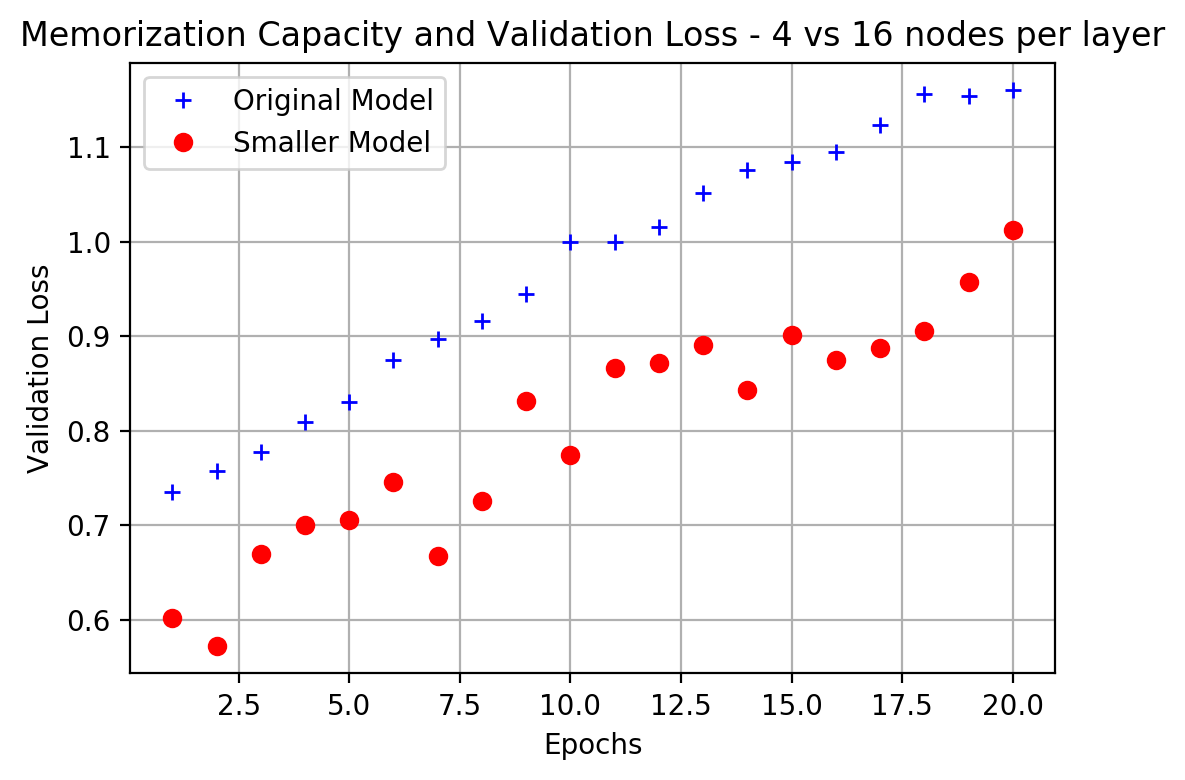

In [32]:
# Plot validation loss for both models
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(6,4), dpi=200)
epochs = range(1, len(old_hist.history['acc']) + 1)
plt.plot(epochs, old_hist.history['val_loss'], 'b+', label='Original Model')
plt.plot(epochs, new_hist.history['val_loss'], 'ro', label='Smaller Model')
plt.xlabel('Epochs'); plt.ylabel('Validation Loss'); plt.grid(True); plt.legend()
plt.title('Memorization Capacity and Validation Loss - 4 vs 16 nodes per layer')
plt.tight_layout()

## Repeating with Higher Capacity

In [35]:
# Model with 512 nodes per layer
model_512 = models.Sequential()
model_512.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
model_512.add(layers.Dense(512, activation='relu'))
model_512.add(layers.Dense(1, activation='sigmoid'))

# Compile
model_512.compile(optimizer='rmsprop', loss='binary_crossentropy', 
             metrics=['accuracy'])

In [36]:
# Fit 
model_512_hist = model_512.fit(partial_x_train, partial_y_train, 
                              batch_size=512, epochs=20, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 8s 558us/step - loss: 0.5624 - acc: 0.7545 - val_loss: 0.3013 - val_acc: 0.8832
Epoch 2/20
15000/15000 [==============================] - 8s 513us/step - loss: 0.2518 - acc: 0.8997 - val_loss: 0.2659 - val_acc: 0.8937
Epoch 3/20
15000/15000 [==============================] - 8s 510us/step - loss: 0.1616 - acc: 0.9429 - val_loss: 0.2940 - val_acc: 0.8906
Epoch 4/20
15000/15000 [==============================] - 9s 578us/step - loss: 0.0924 - acc: 0.9686 - val_loss: 0.4235 - val_acc: 0.8759
Epoch 5/20
15000/15000 [==============================] - 8s 542us/step - loss: 0.1188 - acc: 0.9763 - val_loss: 0.3093 - val_acc: 0.8864
Epoch 6/20
15000/15000 [==============================] - 8s 558us/step - loss: 0.0055 - acc: 0.9997 - val_loss: 0.4767 - val_acc: 0.8871
Epoch 7/20
15000/15000 [==============================] - 8s 520us/step - loss: 5.8168e-04 - acc: 1.0000 - val_loss: 0.585

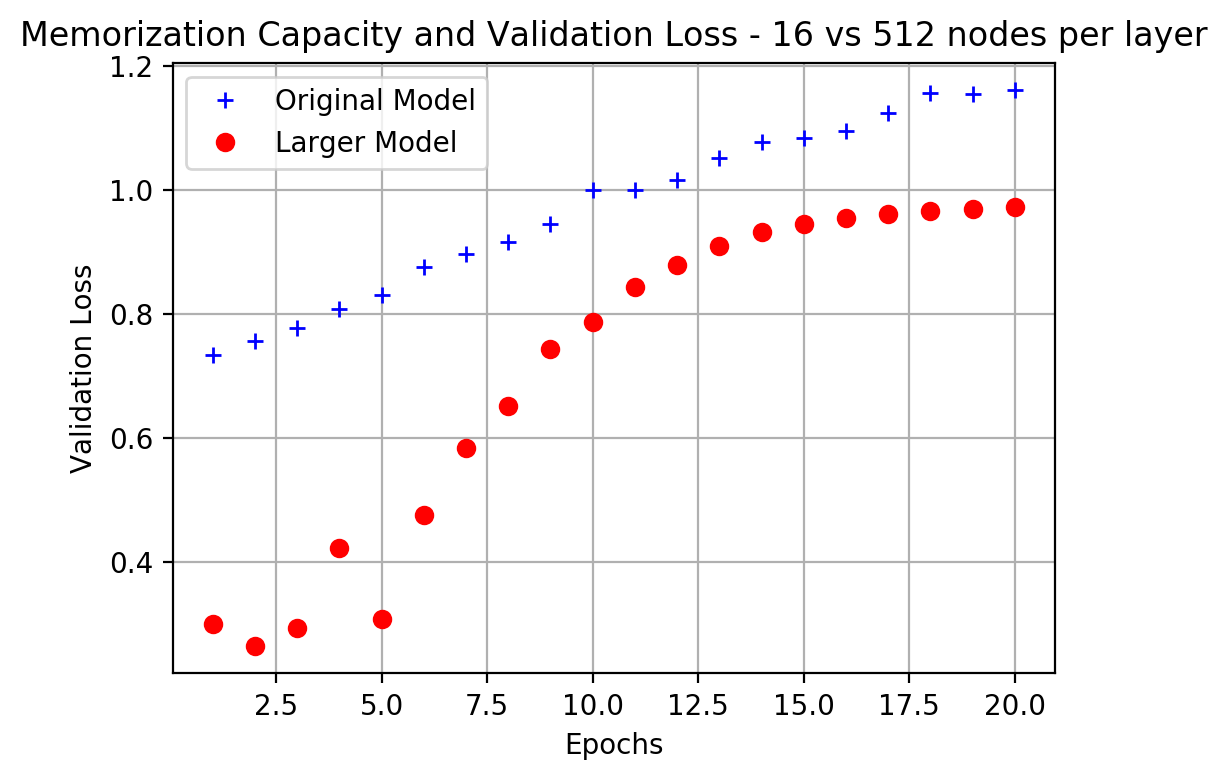

In [39]:
# Comparing the plots
plt.figure(figsize=(6,4), dpi=200)
epochs = range(1, len(model_512_hist.history['acc']) + 1)
plt.plot(epochs, old_hist.history['val_loss'], 'b+', label='Original Model')
plt.plot(epochs, model_512_hist.history['val_loss'], 'ro', label='Larger Model')
plt.xlabel('Epochs'); plt.ylabel('Validation Loss'); plt.grid(True); plt.legend()
plt.title('Memorization Capacity and Validation Loss - 16 vs 512 nodes per layer')
plt.tight_layout()

## Weight Regularization

In [47]:
from keras import regularizers

model_l2 = models.Sequential()
model_l2.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), 
                      activation='relu', input_shape=(10000,)))
model_l2.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), 
                         activation='relu'))
model_l2.add(layers.Dense(1, activation='sigmoid'))

model_l2.compile(optimizer='rmsprop', loss='binary_crossentropy', 
                metrics=['accuracy'])

model_l2_hist = model_l2.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, 
            validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 130us/step - loss: 0.5747 - acc: 0.7647 - val_loss: 0.4362 - val_acc: 0.8708
Epoch 2/20
15000/15000 [==============================] - 1s 96us/step - loss: 0.3695 - acc: 0.8959 - val_loss: 0.3578 - val_acc: 0.8883
Epoch 3/20
15000/15000 [==============================] - 2s 102us/step - loss: 0.2920 - acc: 0.9199 - val_loss: 0.3556 - val_acc: 0.8784
Epoch 4/20
15000/15000 [==============================] - 1s 97us/step - loss: 0.2537 - acc: 0.9326 - val_loss: 0.3667 - val_acc: 0.8709
Epoch 5/20
15000/15000 [==============================] - 1s 97us/step - loss: 0.2295 - acc: 0.9417 - val_loss: 0.3294 - val_acc: 0.8881
Epoch 6/20
15000/15000 [==============================] - 1s 97us/step - loss: 0.2165 - acc: 0.9465 - val_loss: 0.3349 - val_acc: 0.8854
Epoch 7/20
15000/15000 [==============================] - 1s 100us/step - loss: 0.2030 - acc: 0.9531 - val_loss: 0.3430 - val_

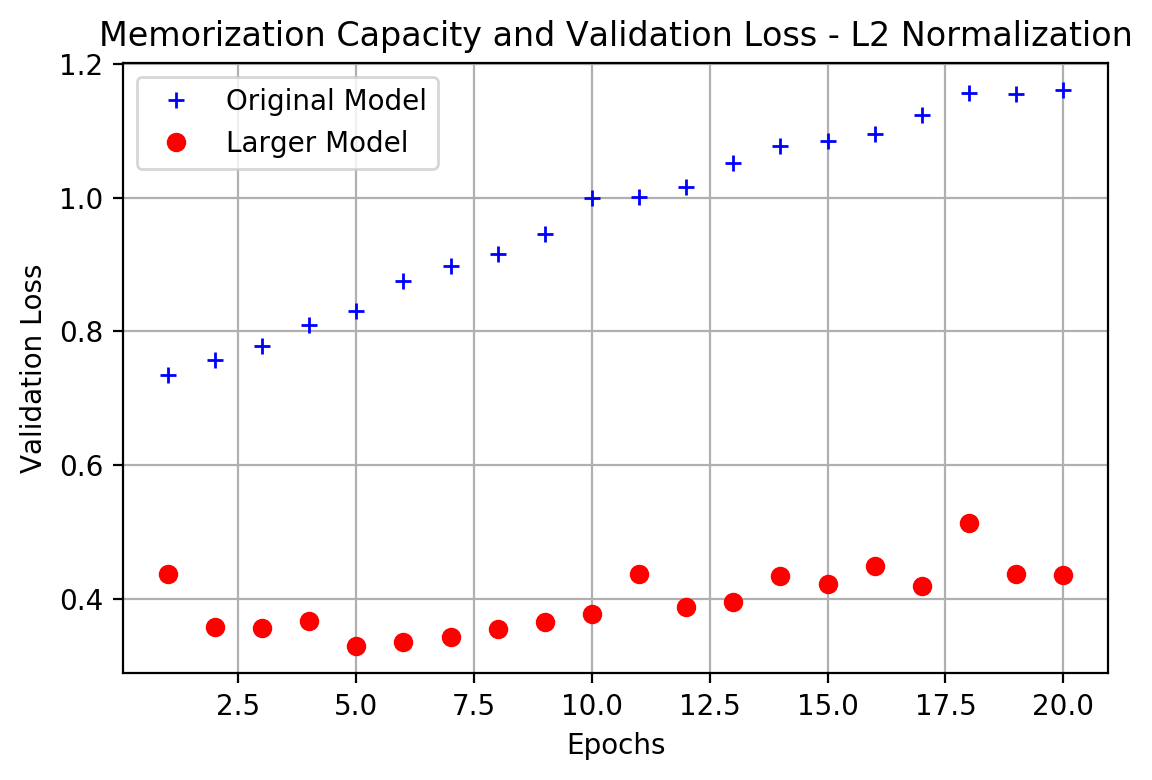

In [48]:
# Comparing the plots
plt.figure(figsize=(6,4), dpi=200)
epochs = range(1, len(model_l2_hist.history['acc']) + 1)
plt.plot(epochs, old_hist.history['val_loss'], 'b+', label='Original Model')
plt.plot(epochs, model_l2_hist.history['val_loss'], 'ro', label='Larger Model')
plt.xlabel('Epochs'); plt.ylabel('Validation Loss'); plt.grid(True); plt.legend()
plt.title('Memorization Capacity and Validation Loss - L2 Normalization')
plt.tight_layout()

# Dropout

In [55]:
model_dropout = models.Sequential()
model_dropout.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model_dropout.add(layers.Dropout(0.5))
model_dropout.add(layers.Dense(16, activation='relu'))
model_dropout.add(layers.Dropout(0.5))
model_dropout.add(layers.Dense(1, activation='sigmoid'))
model_dropout.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
dropout_hist = model_dropout.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512,
                 validation_data=(x_val, y_val), verbose=0)

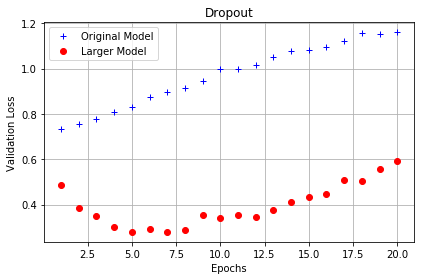

In [57]:
# Comparing the plots
plt.figure(figsize=(6,4))
epochs = range(1, len(dropout_hist.history['acc']) + 1)
plt.plot(epochs, old_hist.history['val_loss'], 'b+', label='Original Model')
plt.plot(epochs, model_dropout_hist.history['val_loss'], 'ro', label='Larger Model')
plt.xlabel('Epochs'); plt.ylabel('Validation Loss'); plt.grid(True); plt.legend()
plt.title('Dropout')
plt.tight_layout()